In [1]:
import numpy as np
from engine import AdvRw2
from agent import ExpSmoother, FPLearningAgent, Level2QAgent, RandomAgent, IndQLearningAgent, Level3QAgent, Level3QAgentMix
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def plot(r0ss, r1ss):
    # We set a fancy theme
    plt.style.use('ggplot')
    N_EXP = len(r0ss)
    #plt.axis([0, max_steps*n_iter, -4.5, 1.5])
    for i in range(N_EXP):
        plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
        plt.plot(moving_average(r1ss[i], 100), 'r', alpha=0.05)

    plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=0.5)
    plt.plot(moving_average(np.asarray(r1ss).mean(axis=0), 100), 'r', alpha=0.5)

    plt.xlabel('t');
    plt.ylabel('R');

    from matplotlib.lines import Line2D
    cmap = plt.cm.coolwarm
    custom_lines = [Line2D([0], [0], color='b'),
                    Line2D([0], [0], color='r')]

    plt.legend(custom_lines,['Agent A', 'Agent B']);

## Q-Learner vs Exp Smoother

0
1
2
3
4
5
6
7
8
9


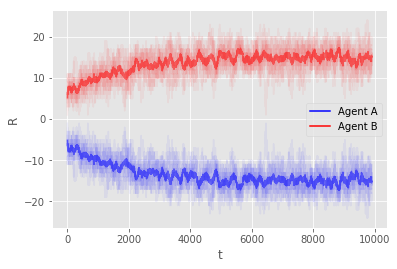

In [3]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  ExpSmoother(env.available_actions, env.available_actions, learning_rate=0.8)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = IndQLearningAgent(env.available_actions, 1, learning_rate=0.1,
                           epsilon=0.1, gamma=gamma, enemy_action_space=None)

    
    n_iter = 10000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    
plot(r0ss, r1ss)

## FPQ-Learner vs Exp Smoother

0
1
2
3
4
5
6
7
8
9


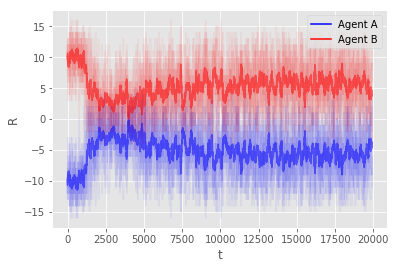

In [4]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  ExpSmoother(env.available_actions, env.available_actions, learning_rate=0.8)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = FPLearningAgent(env.available_actions, env.available_actions, 1, learning_rate=0.1,
                         epsilon=0.1, gamma=gamma)


    
    n_iter = 20000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    
plot(r0ss, r1ss)

## Level 2 Q-Learner vs Exp Smoother

0
1
2
3
4
5
6
7
8
9


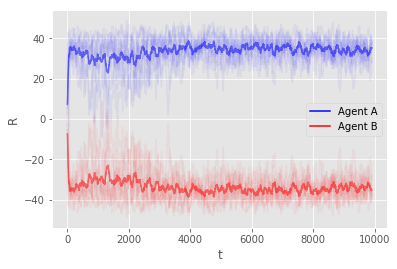

In [11]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  ExpSmoother(env.available_actions, env.available_actions, learning_rate=0.25)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = Level2QAgent(env.available_actions, env.available_actions, n_states=1, 
                      learning_rate=0.1, epsilon=0.1, gamma=0.96)

    
    n_iter = 10000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    
plot(r0ss, r1ss)

## FPQ-Learner vs FPQ-Learner

0
1
2
3
4
5
6
7
8
9


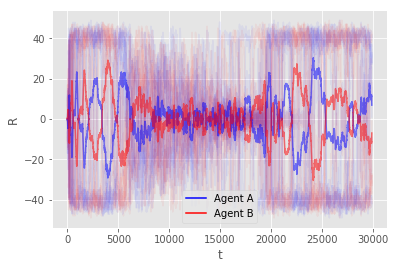

In [15]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  FPLearningAgent(env.available_actions, env.available_actions, 1, learning_rate=0.1,
                         epsilon=0.1, gamma=gamma)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = FPLearningAgent(env.available_actions, env.available_actions, 1, learning_rate=0.1,
                         epsilon=0.1, gamma=gamma)


    
    n_iter = 30000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
    
    
plot(r0ss, r1ss)

## Level2 Q-Learner vs FPQ-Learner

0
1
2
3
4
5
6
7
8
9


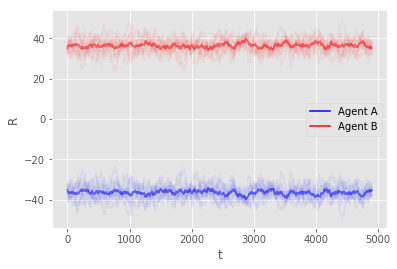

In [16]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  Level2QAgent(env.available_actions,env.available_actions, n_states=1,
                       learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = FPLearningAgent(env.available_actions, env.available_actions, 1, learning_rate=0.1,
                         epsilon=0.1, gamma=gamma)


    
    n_iter = 5000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
plot(r0ss, r1ss)

## Level2 Q-Learner vs Level2 Q-Learner

0
1
2
3
4
5
6
7
8
9


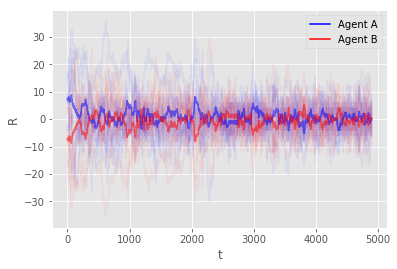

In [19]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  Level2QAgent(env.available_actions,env.available_actions, n_states=1,
                       learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = Level2QAgent(env.available_actions,env.available_actions, n_states=1,
                       learning_rate=0.1, epsilon=0.1, gamma=gamma)

    
    n_iter = 5000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
plot(r0ss, r1ss)

## Level 3 Q-Learner vs Level-2 Q-Learner

0
[0.98422125 0.01577875]
1
[0.37846993 0.62153007]
2
[0.99750706 0.00249294]
3
[9.99842456e-01 1.57544280e-04]
4
[0.39745432 0.60254568]
5
[0.96144271 0.03855729]
6
[0.90398899 0.09601101]
7
[0.98464 0.01536]
8
[0.99747757 0.00252243]
9
[0.1213739 0.8786261]


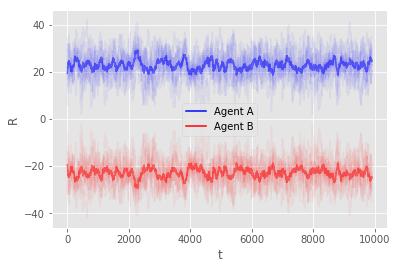

In [9]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 =  Level2QAgent(env.available_actions,env.available_actions, n_states=1,
                       learning_rate=0.1, epsilon=0.1, gamma=0.96)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = Level3QAgentMix(env.available_actions, env.available_actions, n_states=1, 
                      learning_rate=0.1, epsilon=0.1, gamma=0.96)

    
    n_iter = 10000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    print(P1.prob_type)
    r0ss.append(r0s)
    r1ss.append(r1s)
plot(r0ss, r1ss)

## Level 3 Q-Learner vs Level 1 Q-Learner

0
[0.60007459 0.39992541]
1
[2.63882791e-09 9.99999997e-01]
2
[0.09698465 0.90301535]
3
[0.0984576 0.9015424]
4
[1.03146880e-07 9.99999897e-01]
5
[1.03106281e-07 9.99999897e-01]
6
[1.61720981e-06 9.99998383e-01]
7
[6.35588727e-05 9.99936441e-01]
8
[9.83057020e-04 9.99016943e-01]
9
[2.63893905e-09 9.99999997e-01]


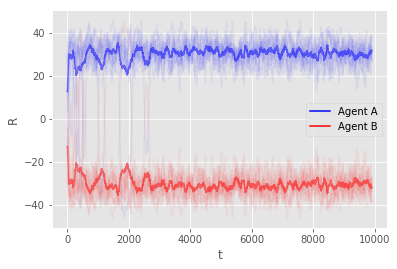

In [10]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 = FPLearningAgent(env.available_actions, env.available_actions, 1, learning_rate=0.1,
                         epsilon=0.1, gamma=gamma)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = Level3QAgentMix(env.available_actions, env.available_actions, n_states=1, 
                      learning_rate=0.1, epsilon=0.1, gamma=0.96)

    
    n_iter = 10000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn
            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)
            #print(P1.enemy.alphaA)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    print(P1.prob_type)
    r0ss.append(r0s)
    r1ss.append(r1s)
plot(r0ss, r1ss)

In [11]:
P1.prob_type

array([1.27608028e-25, 1.00000000e+00])

## Level 3 Q-learner vs Exp Smoother

0
1
2
3
4
5
6
7
8
9


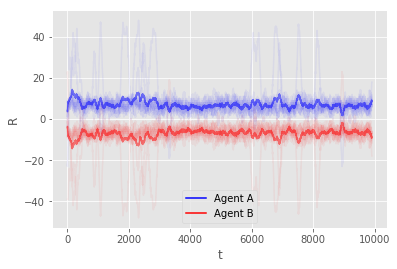

In [14]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 = ExpSmoother(env.available_actions, env.available_actions, learning_rate=0.8)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = Level3QAgentMix(env.available_actions, env.available_actions, n_states=1, 
                      learning_rate=0.1, epsilon=0.1, gamma=0.96)

    
    n_iter = 10000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
plot(r0ss, r1ss)

In [15]:
P1.prob_type

array([0.06243551, 0.93756449])

## Level 2 Q-learner vs Nash Eq

0
1
2
3
4
5
6
7
8
9


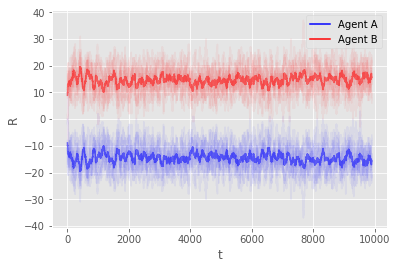

In [4]:
N_EXP = 10

r0ss = []
r1ss = []
#
for n in range(N_EXP):

    gamma = 0.96

    env = AdvRw2(max_steps=1, payout=50, batch_size=1)
    n_states = 1
    ##
    P2 = RandomAgent(env.available_actions, p=0.7)
    #P1 =  RandomAgent( env.available_actions, p=0.5)
    P1 = Level3QAgent(env.available_actions, env.available_actions, n_states=1, 
                      learning_rate=0.1, epsilon=0.1, gamma=0.96)

    
    n_iter = 10000        


    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a1 = P1.act()
            a2 = P2.act()


            # World changes
            _, rewards, done =  env.step([a1,a2])


            # Agents learn

            P1.update(0, [a1, a2], [rewards[0], rewards[1]], 0)
            P2.update(0, [a2, a1], [rewards[1], rewards[0]], 0)

            #s = new_s  #stateless!

            #print(r0, r1)
            r0s.append(rewards[0])
            r1s.append(rewards[1])

        env.reset()
        
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)
plot(r0ss, r1ss)